In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
copied_path_car = '/content/drive/MyDrive/BAT 502 Final Project/tucson_car_accidents.xlsx'
copied_path_rain = '/content/drive/MyDrive/BAT 502 Final Project/tucson_rain.csv'

In [ ]:
import pandas as pd


In [ ]:
car_accidents = pd.read_excel(copied_path_car)
rain = pd.read_csv(copied_path_rain)

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [ ]:
rain = rain.set_axis(['readingId', 'gaugeId', 'gaugeRevisionId', 'remarks', 'Collision_Date',
       'readingHour', 'readingMinute', 'quality', 'rainAmount', 'snowDepth',
       'snowAccumulation', 'createdDate', 'brand', 'model', 'description',
       'gaugeType', 'gaugeTypeOther', 'lat', 'lng'], axis=1, inplace=False)

In [ ]:
car_accidents.head()

,AccidentID,Collision_Date,Year,Month,Weekday,Hour,Collision Type,How Collision Occurred,Injury Severity,Division,Ward,Intersection,OperatorDistracted,OperatorImpaired
0,1801010214,2018-01-01,2018.0,Jan,Monday,300,Vehicle / Vehicle,Angle (Front To Side),Unknown Injury,West,1,Anklam Rd / Shannon Rd,1,0
1,1801010535,2018-01-01,2018.0,Jan,Monday,2100,Vehicle / Vehicle,Rear-End (Front To Back),Non-Incapacitating Injury,West,3,1st Av / Prince Rd,1,1
2,1801010486,2018-01-01,2018.0,Jan,Monday,1800,Vehicle / Vehicle,Head-On (Front To Front),No Injury,Midtown,6,Grant Rd / Columbus Bl,0,0
3,1801010494,2018-01-01,2018.0,Jan,Monday,1600,Vehicle / Vehicle,Head-On (Front To Front),No Injury,East,6,Lee St,1,0
4,1801010223,2018-01-01,2018.0,Jan,Monday,800,Single Vehicle,Single Vehicle,No Injury,South,5,Campbell Av / Benson Hy,0,0


In [ ]:
accidents_aggregate = (car_accidents.groupby(by=['Collision_Date'],as_index=False)['Hour'].count()
.reindex(columns=car_accidents.columns) )

In [ ]:
rain_aggregate = (rain.groupby(by=['Collision_Date'],as_index=False)['rainAmount'].sum()
.reindex(columns=rain.columns) )

In [ ]:
accidents_aggregate=accidents_aggregate[['Collision_Date','Hour']]
accidents_aggregate = accidents_aggregate.set_axis(['Collision_Date','Number_of_Collisions'], axis=1, inplace=False)


In [ ]:
rain_aggregate = rain_aggregate[['Collision_Date', 'rainAmount']]

In [ ]:
accidents_aggregate['Collision_Date'] = pd.to_datetime(accidents_aggregate['Collision_Date'])
rain_aggregate['Collision_Date'] = pd.to_datetime(rain_aggregate['Collision_Date'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df_new = pd.merge(accidents_aggregate, rain_aggregate, on='Collision_Date', how='outer')


In [ ]:
df_new['Number_of_Collisions'].corr(df_new['rainAmount'])

0.04075898870437061

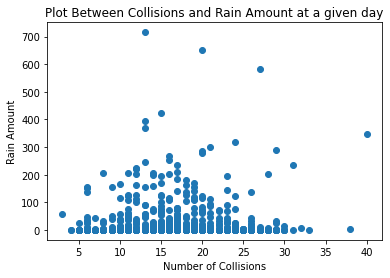

In [ ]:
import matplotlib.pyplot as plot

import numpy as np

# Draw the scatter plot

plot.scatter(df_new['Number_of_Collisions'], df_new['rainAmount'])

plot.title('Plot Between Collisions and Rain Amount at a given day')

plot.xlabel('Number of Collisions')

plot.ylabel('Rain Amount')

plot.show()